In [ ]:
# Storing and Anaysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.utils import to_categorical
from keras.optimizers import SGD


Fetch and Split Data


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

plot_images= train_images / 255.0
plot_labels = train_labels

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images= train_images.astype('float32')
test_images = test_images.astype('float32')
# normalize to range 0-1
#train_images = train_images / 255.0
test_images = test_images / 255.0

Define Class Names and EDA

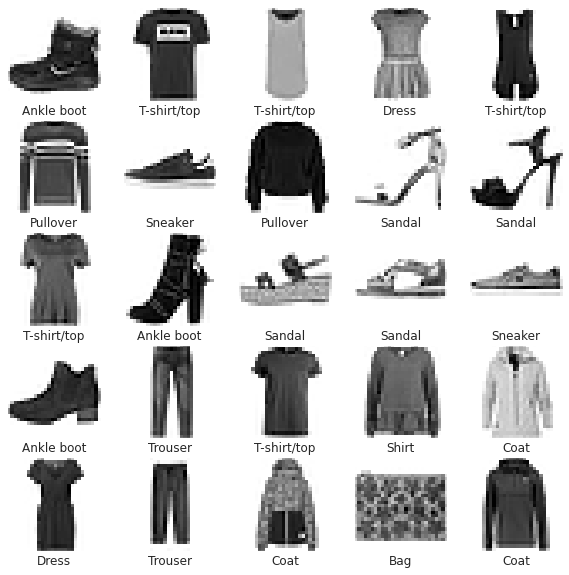

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(plot_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[plot_labels[i]])
plt.show()


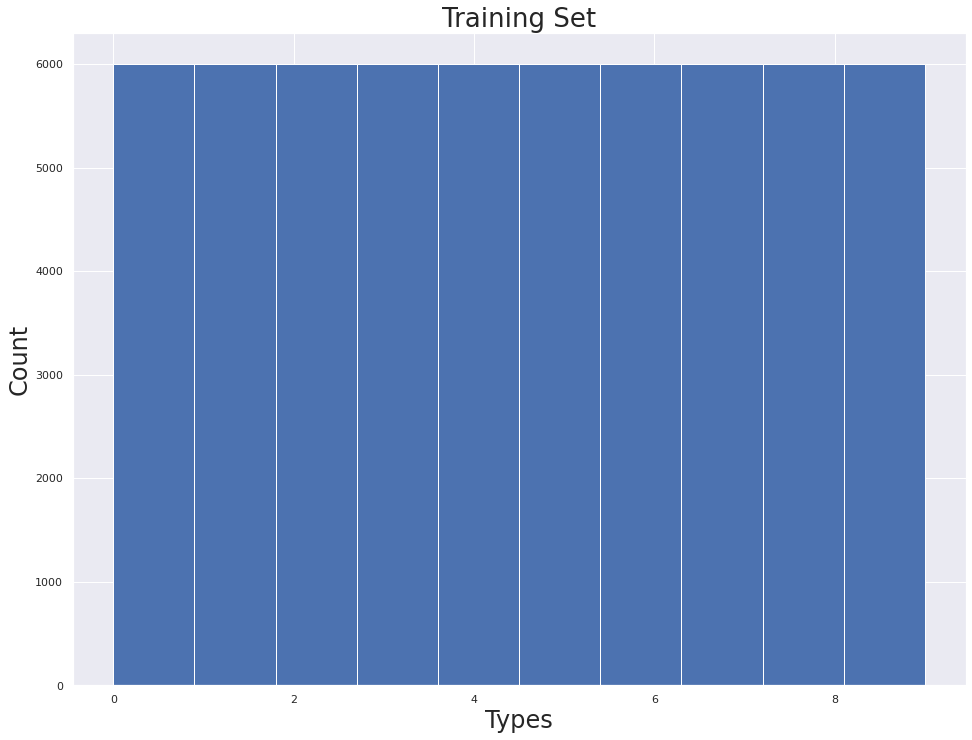

In [ ]:
labels = []

for label in train_labels:

  labels.append(np.argmax(label))

plt.figure(figsize = (16,12))
plt.hist(plot_labels)
plt.title('Training Set', fontsize = 26)
plt.xlabel('Types', fontsize = 24)
plt.ylabel('Count', fontsize = 24)
plt.show()

Build Neural Net


In [ ]:
# Convolutional Neural Network
"""3 Hidden Layers (Nodes: 32, 64, 128)"""
model = Sequential()
model.add(Conv2D(32, (3,3),padding='same', activation = 'relu', input_shape = (28, 28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization()) # Normalize 
model.add(MaxPooling2D(pool_size=(2, 2))) # Max value in 2x2 segment is chosen
model.add(Dropout(0.25)) # 25% chance to drop a node

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 25% chance to drop a node

model.add(Flatten()) # Flattens the 14x14x128 into 25,088 (changes dimensions into just one)

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5)) # 50% of a node dropping
model.add(Dense(10, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
        
    
# Display Model Summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
batch_normalization_23 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 9, 9, 64)         

In [ ]:
# Settings for how the Generator acts with images
train_datagen = ImageDataGenerator(
    rotation_range=10, # Rotation
    rescale=1./255, # Re-Scaling
    shear_range=0.1, # Tilts the image 
    zoom_range=0.2, # Zooming (basically distance)
    horizontal_flip=True, # Mirroring
    vertical_flip= True,
    width_shift_range=0.1, # Shifted Left and Right
    height_shift_range=0.1, # Shifted Up and Down
    validation_split=.15 
)

# Generator for the Training set
train_generator = train_datagen.flow(
    x = train_images,
    y = train_labels,
    batch_size = 15, 
    subset = "training"
)

valid_generator = train_datagen.flow(
    x = train_images,
    y = train_labels,
    batch_size = 15,
    subset = "validation"
)

Train Neural Net

In [ ]:
model.fit(train_generator,batch_size=15, shuffle=True, epochs=10, validation_data = valid_generator)

Epoch 1/10
3400/3400 [==============================] - 208s 61ms/step - loss: 1.0333 - accuracy: 0.6332 - val_loss: 0.6556 - val_accuracy: 0.7517
Epoch 2/10
3400/3400 [==============================] - 207s 61ms/step - loss: 0.7333 - accuracy: 0.7429 - val_loss: 0.5939 - val_accuracy: 0.7783
Epoch 3/10
3400/3400 [==============================] - 212s 62ms/step - loss: 0.6672 - accuracy: 0.7687 - val_loss: 0.5253 - val_accuracy: 0.8112
Epoch 4/10
3400/3400 [==============================] - 207s 61ms/step - loss: 0.6232 - accuracy: 0.7847 - val_loss: 0.5093 - val_accuracy: 0.8154
Epoch 5/10
3400/3400 [==============================] - 207s 61ms/step - loss: 0.6004 - accuracy: 0.7956 - val_loss: 0.4638 - val_accuracy: 0.8366
Epoch 6/10
3400/3400 [==============================] - 209s 61ms/step - loss: 0.5839 - accuracy: 0.8024 - val_loss: 0.5001 - val_accuracy: 0.8208
Epoch 7/10
3400/3400 [==============================] - 209s 62ms/step - loss: 0.5596 - accuracy: 0.8093 - val_loss: 0

Test Data

In [ ]:
preds = model.predict(test_images)

In [ ]:
acc = model.evaluate(test_images, test_labels, verbose=0)
acc

[0.3854485750198364, 0.8690999746322632]

In [ ]:
model.save("fashion")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: fashion/assets


In [ ]:
pred_labels = []
test_labels_single = []

for y ,pred in zip(test_labels, preds):

  test_labels_single.append(np.argmax(y))
  pred_labels.append(np.argmax(pred))

Generate Confuson Matrix

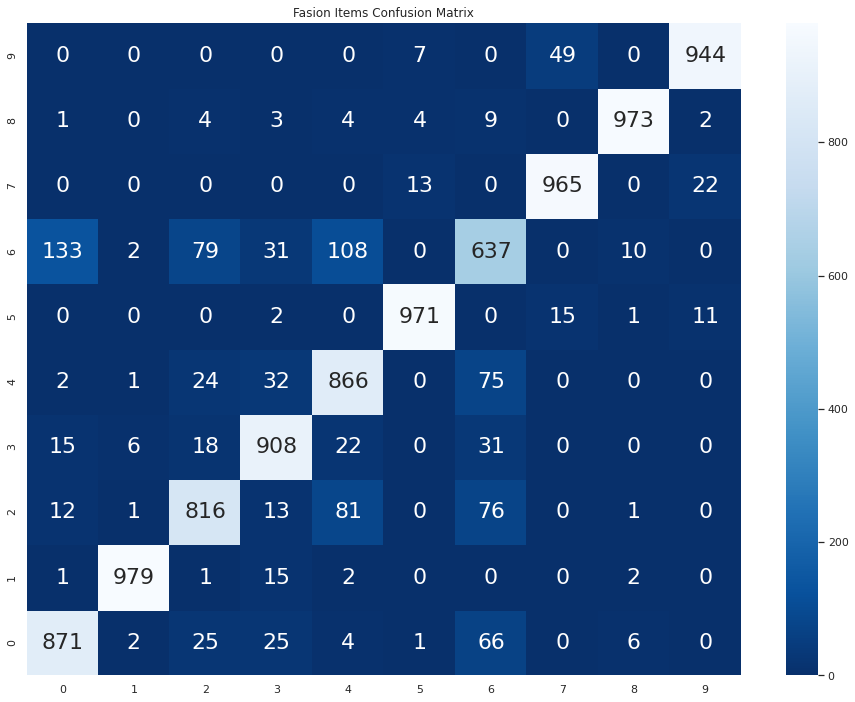

In [ ]:
def confusionMatrix(ys,preds):
    
    N = len(ys)
    #Generate empty matrix
    confuse = np.zeros((10,10),dtype=int)
    
    #loop through both arrays
    for i in range(N):
    
      #increase count in entry of each label
      confuse[ys[i],int(preds[i])] = confuse[ys[i],int(preds[i])] + 1
    
    #return as dataframe
    return pd.DataFrame(confuse)

#Make Confusion Matrix
con = confusionMatrix(test_labels_single,pred_labels)
fig1 = plt.figure(figsize=(16,12))
plt.rcParams.update({'font.size': 22})
ax = sns.heatmap(con, annot=True, cmap ='Blues_r' ,fmt='d')
plt.title("Fasion Items Confusion Matrix")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

Code for deployment

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#model2 = load_model("/content/drive/My Drive/fashion")

def predictOnImage(filepath):
  img = load_img(filepath, color_mode="grayscale")
  img = img.resize(size = (28,28) )
  img = img_to_array(img)
  img = img.reshape(1, 28, 28, 1)
  img = img.astype('float32')
  img = img / 255.0

  #return class_names[np.argmax(model.predict(img))]
  return(model2.predict(img))

predictOnImage("/content/bag.png")


array([[1.8150352e-01, 3.2907501e-05, 7.5314105e-01, 6.7874284e-06,
        4.9756723e-04, 1.3386063e-05, 1.0483496e-02, 1.8080874e-04,
        4.4554073e-02, 9.5863473e-03]], dtype=float32)